# India Liver Disease Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

Download the Liver patient data from the following sources:

https://www.kaggle.com/uciml/indian-liver-patient-records

Use the following 07 features from this dataset:
* Age;
* Total_Bilirubin;
* Direct_Bilirubin;
* Alkaline_Phosphotase;
* Alamine_Aminotransferase;
* Total_Protiens;
* Albumin

The task is to predict whether a patient suffers from a liver disease using above
features. Split your data into test and train.
First use a random forest algorithm for performing this task.
Then, use a Adaboost Classifier to perform similar task.
Compare the accuracy of these two algorithms.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is part of Indian different states liver patients.
* The data consists of 583 Rows and 11 Columns
* kaggle sources:

https://www.kaggle.com/uciml/indian-liver-patient-records

The Indian Liver Patients Dataset is generated from a study done on liver patients in the North East region of Andhra Pradesh, India. This region, where I come from, sees a high rate of alcohol abuse, which is a leading cause of liver health issues.

This region also typically sees males consuming more alcohol than females, so we may expect to see a higher prevalance of liver disorders among males than in females. The feature descriptions are self-explanatory, so let's dive into the addressing the problem at hand.

The problem relates to predicting whether a subject suffers from a liver disease, based on liver function diagnostic results. There are 167 healthy subjects and 416 patients in this dataset, encoded as 2 & 1, respectively. I will train and compare the performances of two different Advanced Machine Learning Classifiers - AdaBoostClassifier and RandomForestClassifier, for this purpose.

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

D:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv(r"indian_liver_patient.csv")

**Show Top 5 Records**

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Shape of the dataset**

In [4]:
df.shape

(583, 11)

**Summary of the dataset**

In [5]:
# Display summary statistics for a dataframe
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.rename(columns = {'Dataset':'liver_disease_YN'}, inplace =True)
# Original dataframe has 1 & 2 encoding for whther a subject has liver disease or not, respecively.I will change this into a binary 0 & 1 feature
target_replace_dict = {1:1, 2:0}
df['liver_disease_YN'].replace(target_replace_dict, inplace = True)

**Check Datatypes in the dataset**

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  liver_disease_YN            583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## 3. EXPLORING DATA

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'liver_disease_YN']

We have 1 categorical features : ['Gender']


In [9]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Male      75.643225
Female    24.356775
Name: Gender, dtype: float64
---------------------------


**Insights**
 
 - `Gender` column is the only categorical feature others are numeric.
 - `liver_disease_YN` seems to be treated as target column.

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

In [10]:
df[numeric_features[1]]
numeric_features

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'liver_disease_YN']

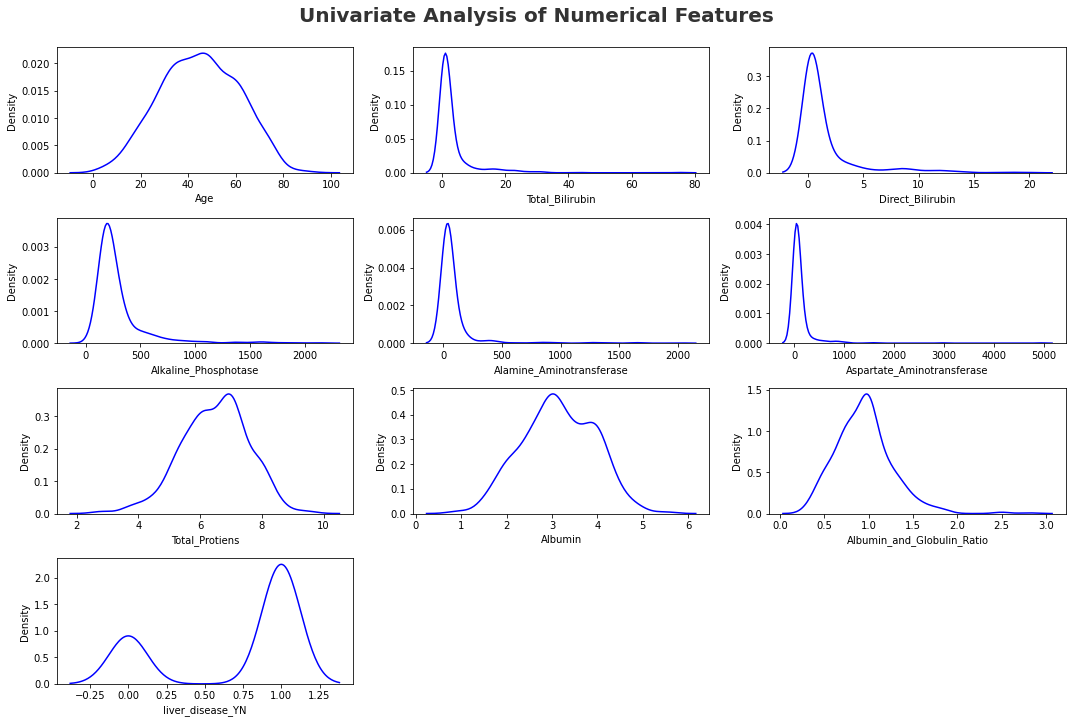

In [11]:
import math
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# Calculate number of rows and columns needed for subplots
n_features = len(numeric_features)
n_cols = 3  # you can change this value to fit your needs
n_rows = math.ceil(n_features / n_cols)


for i in range(0, len(numeric_features)):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

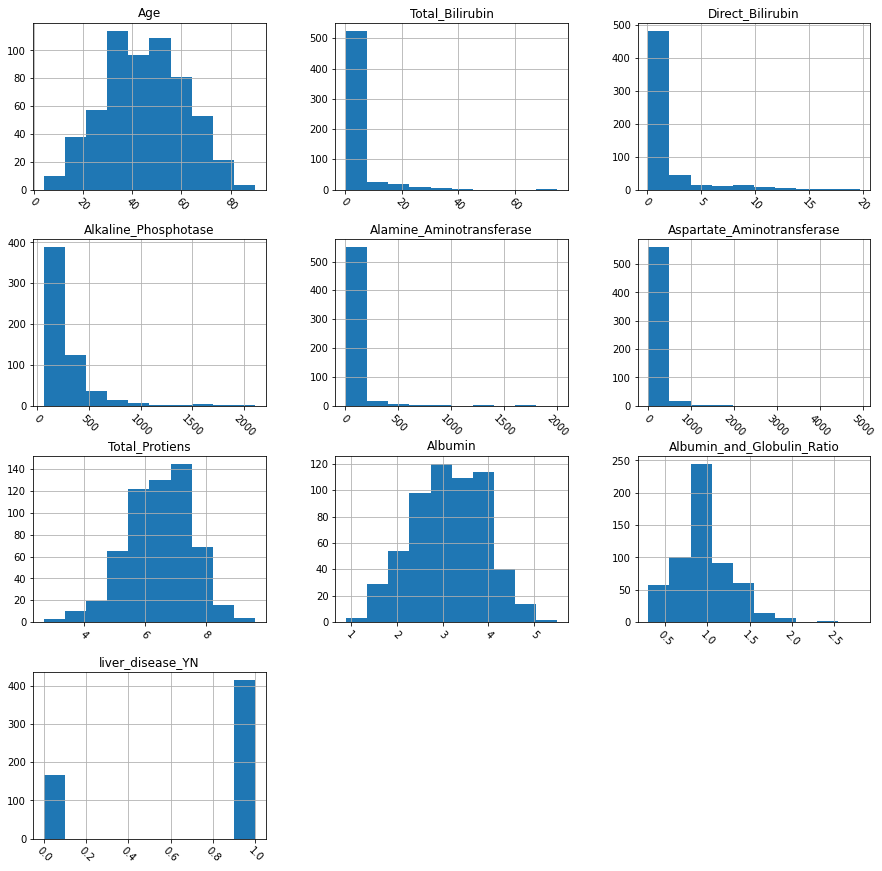

In [12]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

**Insights**
- This is interesting. The following observations can be made from these plots.


1.   The median age of the participants is in the late 40s to early 50s range.
2.   My initial hypothesis was that males in this geographical region have been facing higher amount of liver issues. Let's find out if this is the case in the next set of visualizations.
4. We do not have baseline values for healthy people in the dataset's Kaggle page, nor in the feature descripion. I will attempt to find this out using the groupby function for healthy livers (df.liver_disease_YN == 0)
 - `Total_Bilirubin`, `Direct_Bilirubin`, `Alkaline_Phosphotase`, `Alamine_Aminotransferase`,'`Aspartate_Aminotransferase`' column looks more skewed but it may be because of outlies.


In [13]:
## Artificial Baseline, Mean (not verified against medical standards)
baseline_avg = df[df.liver_disease_YN == 0].groupby('Gender').mean()
baseline_avg

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
Gender,,,,,,,,,,
Female,42.740000,0.90600,0.268000,203.280000,29.740000,31.840000,6.58000,3.35000,1.007347,0.0
Male,40.598291,1.24359,0.451282,226.794872,35.324786,44.470085,6.52735,3.34188,1.038966,0.0


In [14]:
df[df.liver_disease_YN == 1].groupby('Gender').mean()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
Gender,,,,,,,,,,
Female,43.347826,3.092391,1.381522,356.173913,67.554348,89.260870,6.693478,3.231522,0.917582,1.0
Male,46.950617,4.468827,2.077469,308.453704,108.706790,151.453704,6.392593,3.012037,0.913220,1.0


- The above *mean values* seems very off, with *significantly different values for Males and Females*. Since mean is susceptible to outliers, lets redo this with median and compare the baseline median values of healthy subjects against subjects with liver disease (df.liver_disease_YN == 1).


In [15]:
## Artificial Baseline, Median (not verified against medical standards)
baseline_median = df[df.liver_disease_YN == 0].groupby('Gender').median()
baseline_median

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
Gender,,,,,,,,,,
Female,39.5,0.8,0.2,188.0,24.0,27.0,6.75,3.25,1.0,0.0
Male,40.0,0.8,0.2,185.0,28.0,30.0,6.50,3.50,1.0,0.0


In [16]:
df[df.liver_disease_YN == 1].groupby('Gender').median()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
Gender,,,,,,,,,,
Female,45.0,0.9,0.20,203.5,27.0,33.0,6.8,3.3,0.9,1.0
Male,47.0,1.7,0.75,231.5,44.5,56.0,6.4,3.0,0.9,1.0


#### Observations:
1. A simple visual comparison between the median tables reveals that in general, people with liver issues have higher feature medians than those with healthy livers, for both genders.
2. For healthy test subjects, feature values remain largely equal for both genders.
3. The median age for subjects with liver disease is higher for both genders.
4. Females are susceptible to liver disease at a younger age than males.
5. On a whole, this seems to indicate that older population in the region are more susceptible to liver disease. Does this mean younger people have access to better healthcare or are generally health conscious? Could this be because of poor socio-economic conditions, access to disposable incomes leading to alcohol abuse or shortage of medical services? 
- Need additional data to answer these questions.

* Let's verify the above observations visually, and understand the distribution of features across the binary groups, Gender and Liver Disease.

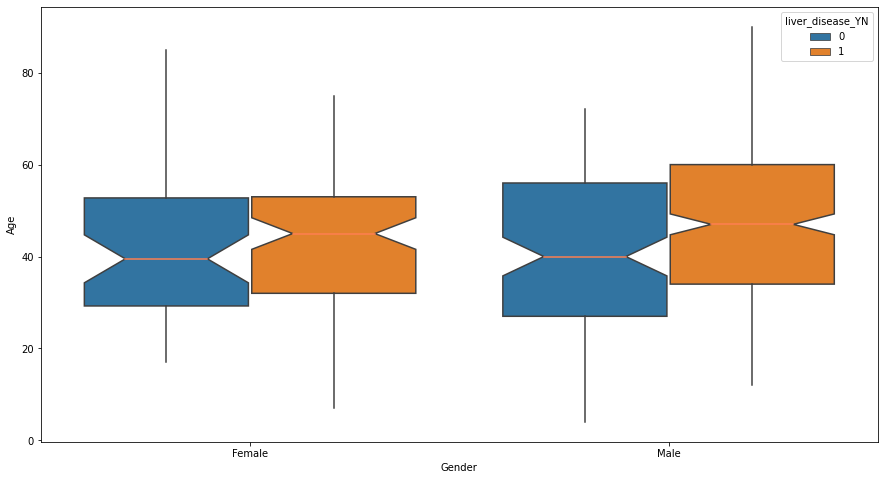

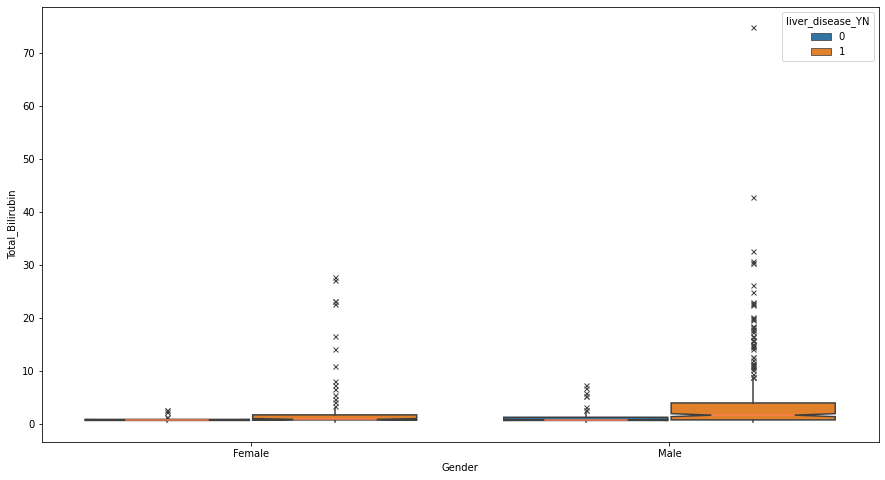

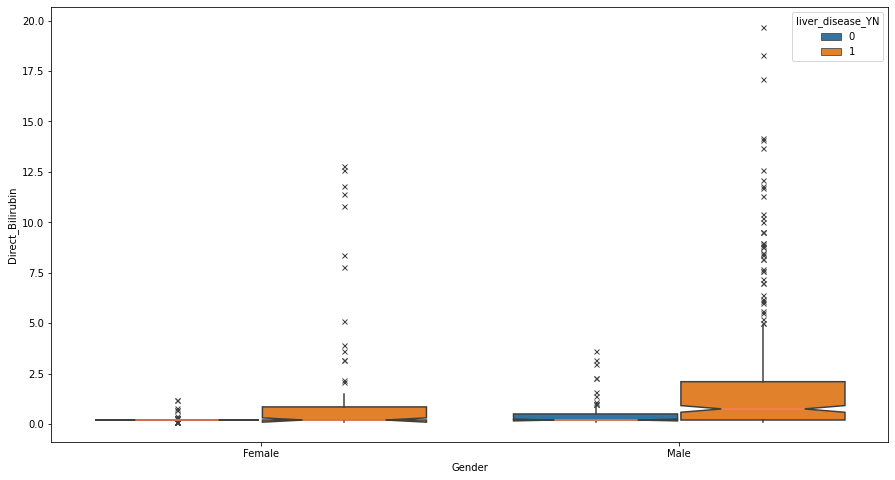

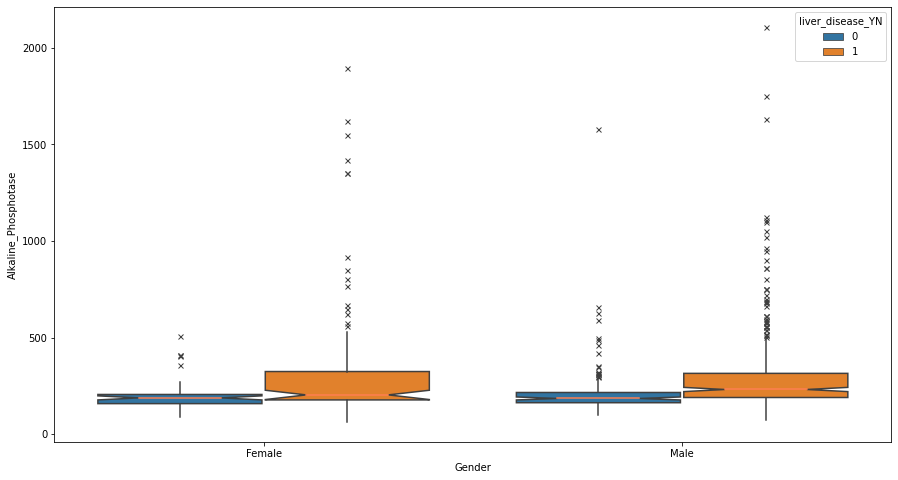

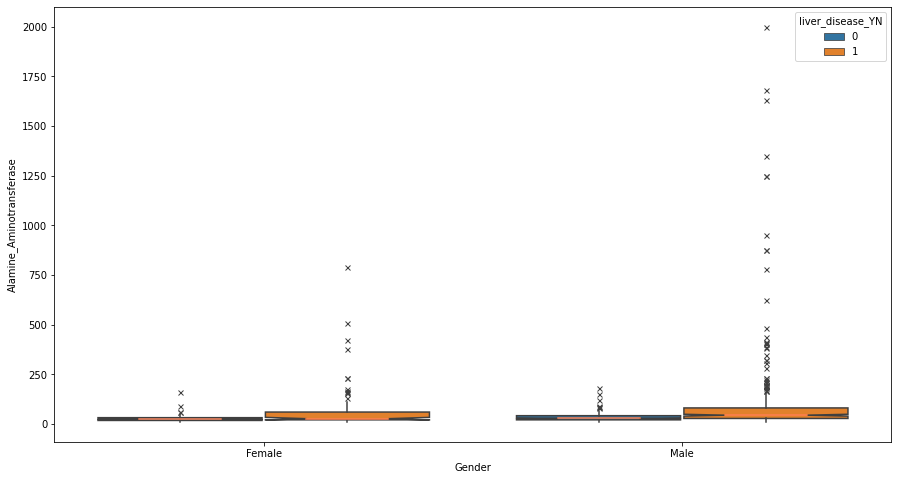

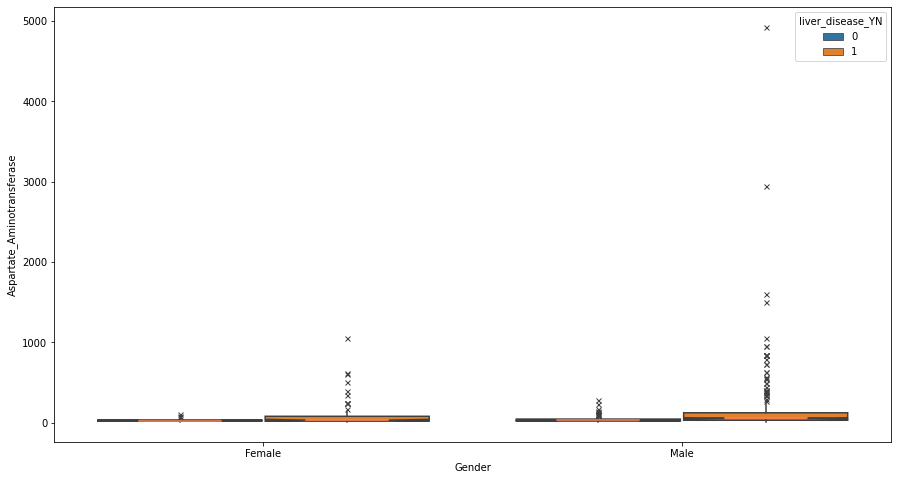

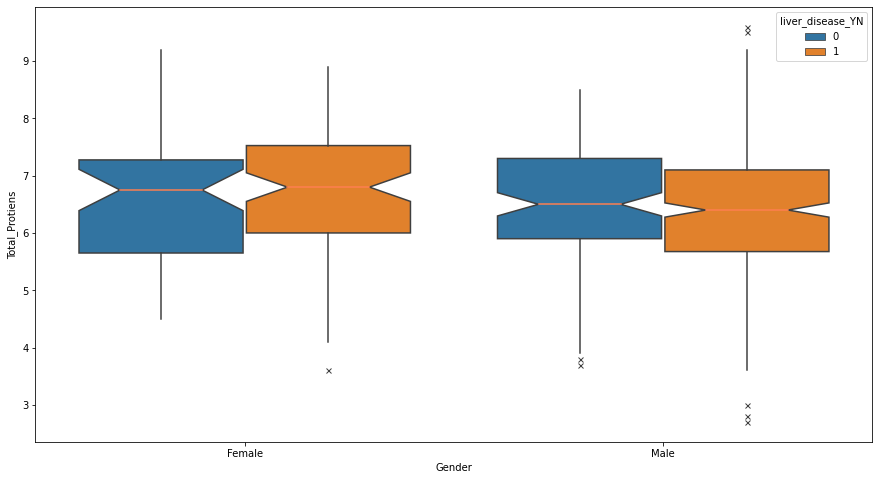

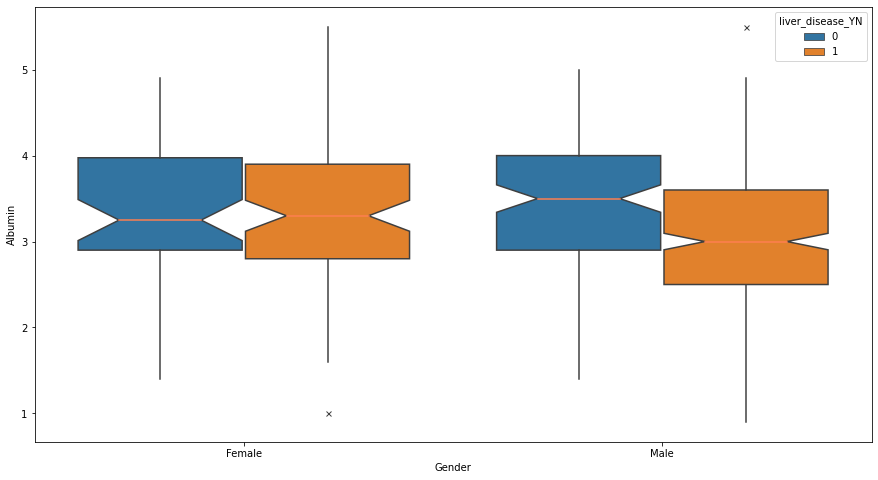

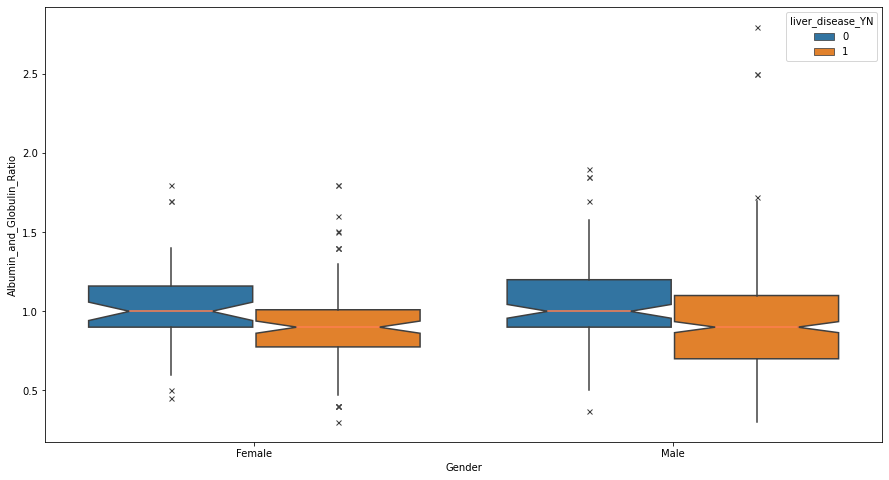

In [21]:
for feature in df.drop(['Gender', 'liver_disease_YN'],axis=1).columns:
    plt.figure(figsize=(15,8))
    sns.boxplot(df, x = 'Gender', y = feature, notch = True, flierprops={"marker": "x"},
                showcaps=False, medianprops={"color": "coral"}, hue = 'liver_disease_YN', dodge = True) #customizing the boxplots
    #fig.savefig(f'boxplot_{feature}_gender.png', bbox_inches='tight')
    plt.show();

#### Observations
1. As expected, within each gender, feature medians tend to be higher for those with liver disease as opposed to healthy subjects. An excpetion to this is the feature `Albumin`, where diseased subjects tend to score lower.

2. The feature `Total_Protiens` provides little variance within the gender groups, and across the target. Normally, this can be dropped, but retaining it as per the problem statement.

3. The features `Direct_bilirubin` and `Total_bilirubin` show a significant variance across both genders, and higher feature values seem to correspond towards having liver problems. These two features seem to be significant in predicting the liver dysfunction.

4. Apart from these there's too much of an overlap of the Inter Quartile Range of the barplots to infer conclusively, that any of the features influence liver disease for either genders. I suspect a one-way ANOVA test between the named groups would give different insights, so I'll move forward with the analysis.

### Categorical Features

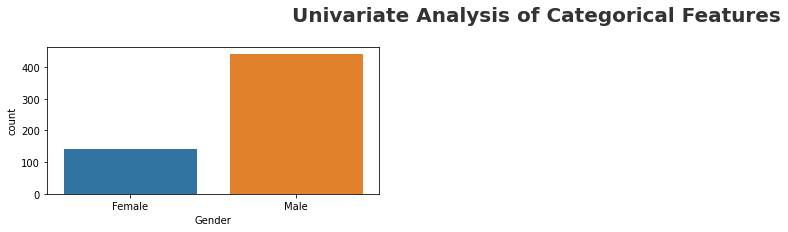

In [57]:
# categorical columns
#categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
 - The count of male patient is more.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [23]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['liver_disease_YN']

We have 9 continuous_features : ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


### Check Multicollinearity in Numerical features

In [24]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


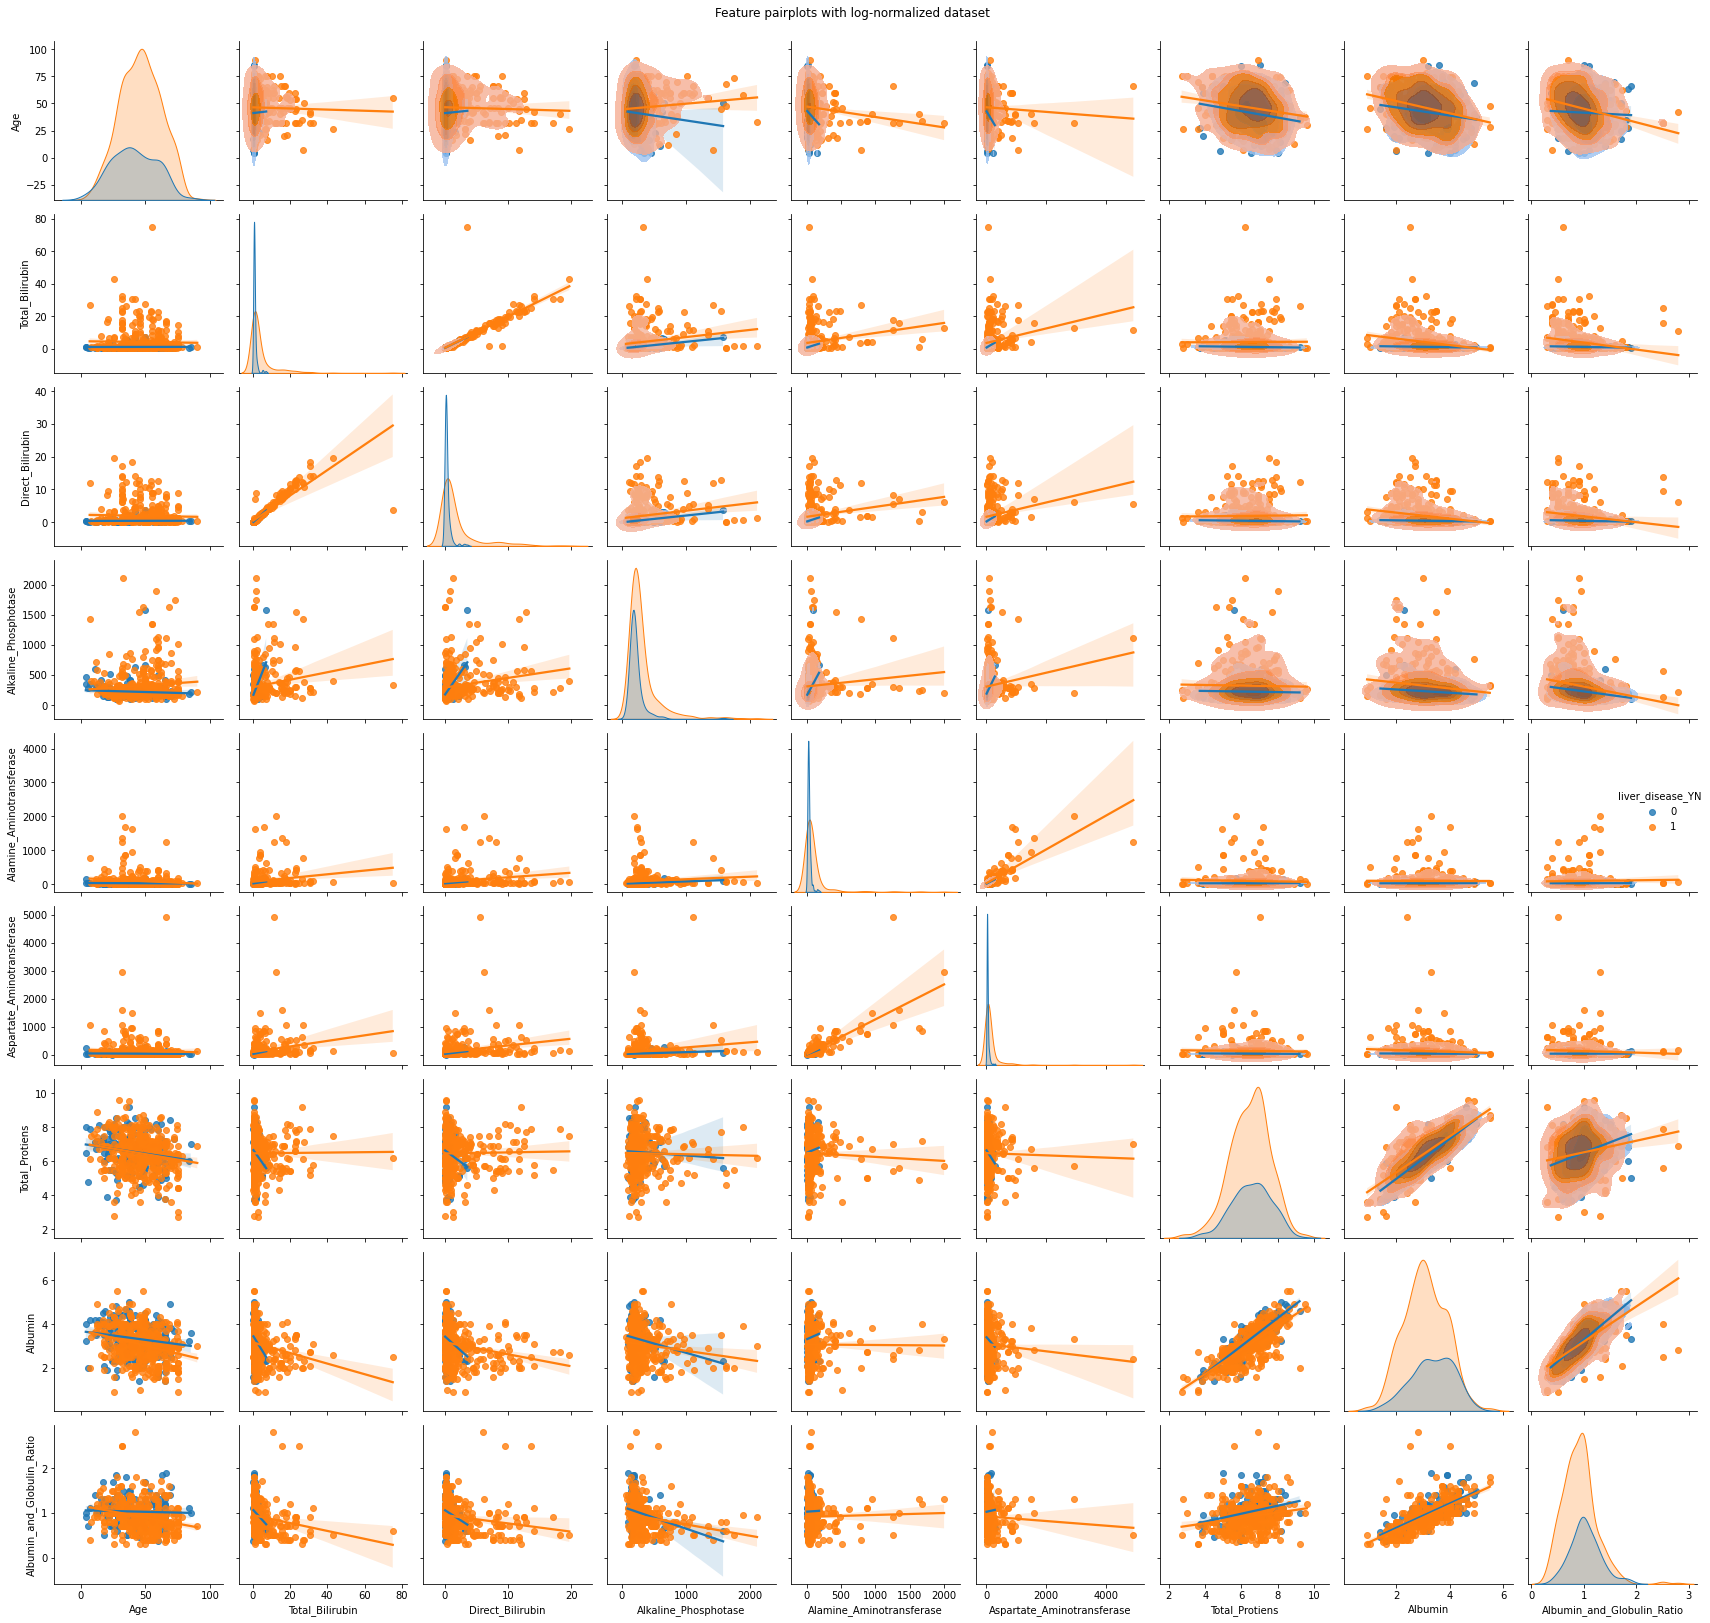

In [25]:
g = sns.pairplot(df.drop('Gender', axis = 1), kind = 'reg', hue = 'liver_disease_YN')
g.map_upper(sns.kdeplot, levels = 6, alpha = 0.8, hue = df['liver_disease_YN'], fill = True)
plt.suptitle('Feature pairplots with log-normalized dataset', y = 1)

plt.savefig('Feature pairplots with log-normalized dataset.png')
plt.tight_layout()
plt.show();

#### The pairplot reveals some interesting trends in the data.
1. 4 feature pairs exhibit a strong collinearity.
2. The remaining pairplots do not seem to show any trends.

I will verify this with a correlation map.

In [34]:
def corr_map(df, title, method='spearman', numeric_only = False, tick_size = 10, annot_size=10, annot_kws=10):
    mask = np.triu(np.ones_like(df.corr(numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.2f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)

    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def corr_map(df, title, method='spearman', tick_size=10, annot_size=10, annot_kws=10):
    """
    Generates a correlation heatmap for the given DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data
    - title: str, title of the heatmap
    - method: str, method of correlation ('pearson', 'spearman', 'kendall'), default is 'spearman'
    - tick_size: int, font size for tick labels, default is 10
    - annot_size: int, font size for annotation text, default is 10
    - annot_kws: int, font size for annotation keywords, default is 10
    """

    # Select only numeric columns if necessary
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr(method=method)
    
    # Create a mask to hide the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create the heatmap
    heatmap = sns.heatmap(corr_matrix, fmt='.2f', annot=True, annot_kws={'size': annot_kws}, mask=mask, cmap='BrBG')
    
    # Set the tick sizes and rotation
    plt.xticks(rotation=80, fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    
    # Set the title
    heatmap.set_title(title, fontdict={'fontsize': annot_size}, pad=12)
    
    # Show the plot
    plt.show()



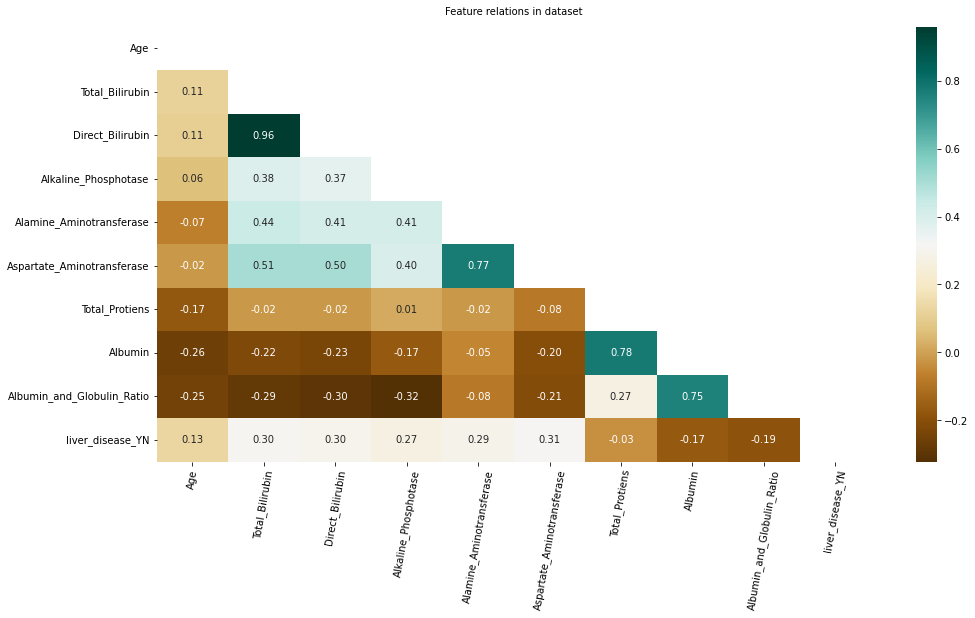

In [38]:
plt.figure(figsize=(16, 8))
corr_map(df.drop('Gender', axis = 1), 'Feature relations in dataset')

**Insights**
 - As expected, 4 feature pairs (given below) are strongly correlated, with pair 2 having a near perfect positive correlation of 1.
1. `Albumin` and `Total_Protiens`,
2. `Total_Bilirubin` and `Direct_Bilirubin`
3.  `Albumin_and_Globulin_Ratio' and 'Albumin'
4.  `Aspartate_Aminotransferase' and 'Alamine_Aminotransferase'

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

- Here we test correlation of Categorical columns with Target column i.e liver_disease_YN

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [58]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['liver_disease_YN'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Gender,Fail to Reject Null Hypothesis


**Report** 
* Here `Gender` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Checking Null Values

In [40]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
liver_disease_YN              0
dtype: int64

In [41]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continous features :',continues_features)

Num of continous features : ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


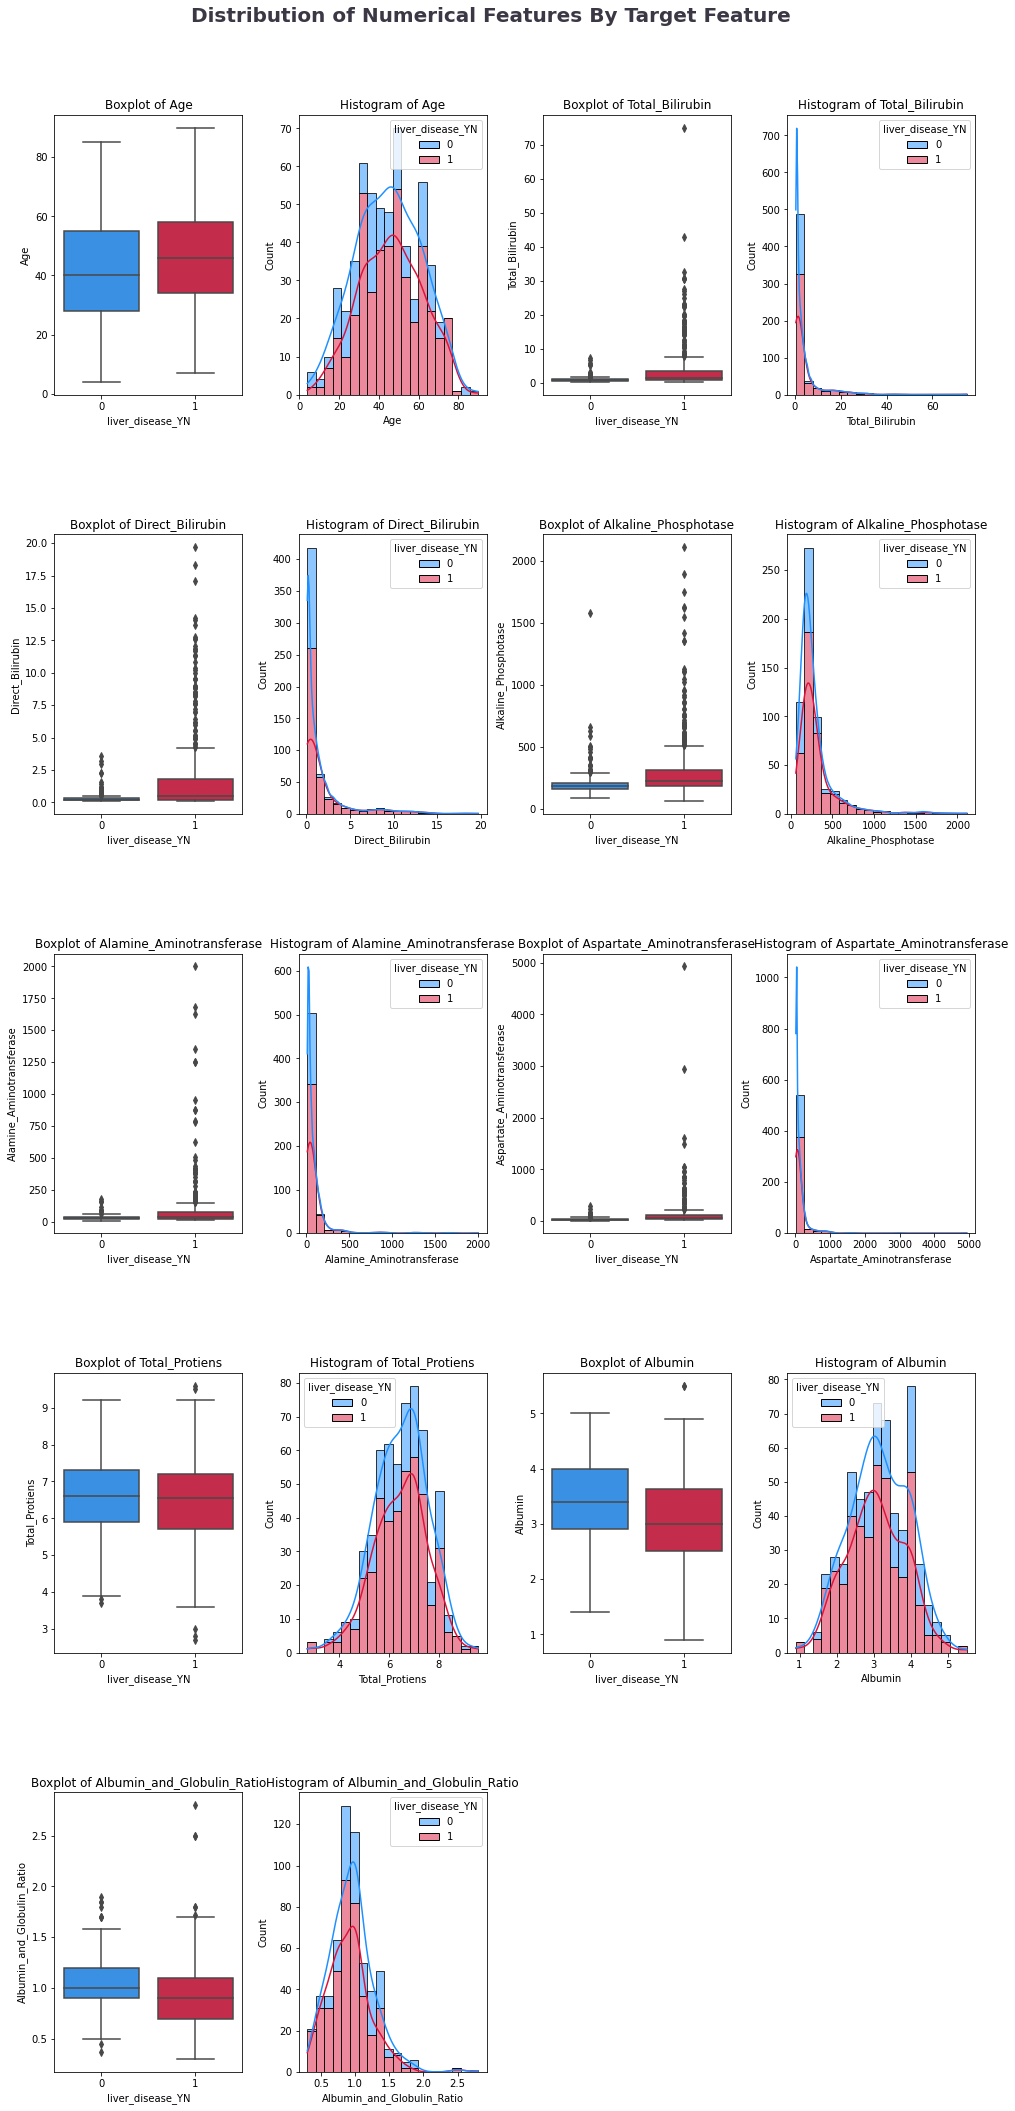

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import math


# Number of continuous features
num_features = len(continues_features)

# Calculate the number of rows needed for the subplots
nrows = math.ceil(num_features / 2)
ncols = 2  # Since we are always using 2 columns

clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(nrows, ncols * 2, figsize=(14, 6 * nrows))  # *2 for boxplot and histogram
fig.suptitle('Distribution of Numerical Features By Target Feature', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

# Flatten the axis array for easy indexing
ax = ax.flatten()

for i, col in enumerate(continues_features):
    sns.boxplot(data=df, x='liver_disease_YN', y=col, palette=clr1, ax=ax[i * 2])
    ax[i * 2].set_title(f'Boxplot of {col}', fontsize=12)
    
    sns.histplot(data=df, x=col, hue='liver_disease_YN', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i * 2 + 1])
    ax[i * 2 + 1].set_title(f'Histogram of {col}', fontsize=12)

# Remove any empty subplots
for j in range(len(continues_features) * 2, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout(pad=2.0) # Increase padding to avoid overlapping titles
fig.subplots_adjust(top=0.93, hspace=0.5, wspace=0.3)  # Increase horizontal and vertical space

plt.show()


## Initial Analysis Report

* **`Total_Bilirubin`, `Direct_Bilirubin`, `Alkaline_Phosphotase`, `Alamine_Aminotransferase` has many outliers and right skewed which can be Handled in Feature Engineering.**
* **There are 4 null values in the Albumin and Globulin Ratio column.**
* **The `liver_disease_YN` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

## 4. Visualization

### 4.1 Visualize the Target Feature

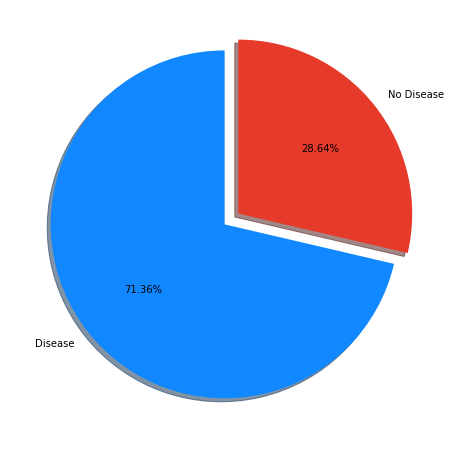

In [43]:
percentage = df.liver_disease_YN.value_counts(normalize=True)*100
labels = ["Disease","No Disease"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.

### 4.2 Does Gender of patient has any impact on LiverDisease status ?

In [44]:
#group data by continent and their count of case_status
df.groupby('Gender')['liver_disease_YN'].value_counts(normalize=True).to_frame()*100

liver_disease_YN
Gender liver_disease_YN                  
Female 1                        64.788732
       0                        35.211268
Male   1                        73.469388
       0                        26.530612

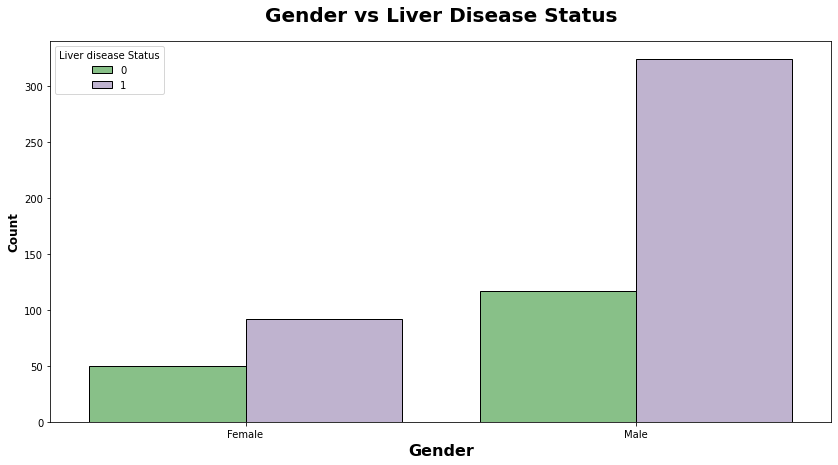

In [45]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Gender",hue="liver_disease_YN", data=df, ec = "black",palette="Accent")
plt.title("Gender vs Liver Disease Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.legend(title="Liver disease Status", fancybox=True)
plt.show()

In [46]:
df2 = df.copy()

In [47]:
df2['liver_disease_YN'].isin([1])

0       True
1       True
2       True
3       True
4       True
       ...  
578    False
579     True
580     True
581     True
582    False
Name: liver_disease_YN, Length: 583, dtype: bool

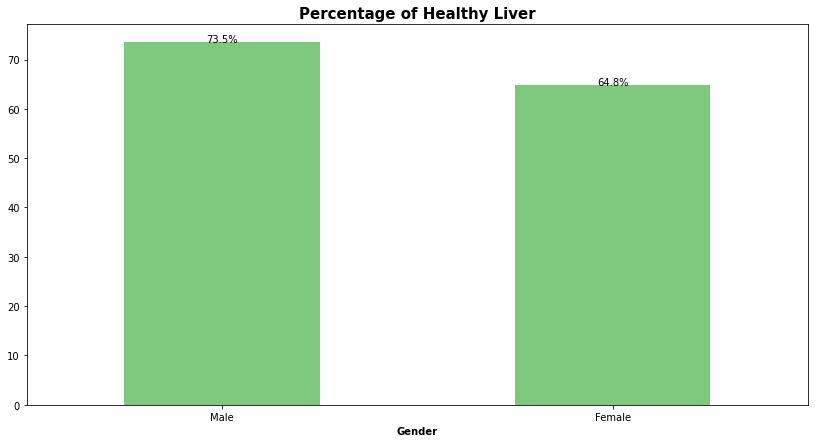

In [61]:
plt.figure(figsize=[14,7])

(100*df2[df2["liver_disease_YN"].isin([1])]['Gender'].value_counts()/df2['Gender'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Healthy Liver" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["liver_disease_YN"].isin([1])]['Gender'].value_counts()/df2['Gender'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Gender' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report:**
* As per the Chart Males have more healthier liver compare to females.
* 43% of Certified applications are from Asia.
* This is followed by Europe with 11% of Certified applications.
* Highest chance of getting certified if you are from `Europe` and followed by `Africa`

### 4.3 Does patient's Age has any impact on Live Disease status ?

In [49]:
#group data by unit_of_wage and count the case_status
df.groupby('Age')['liver_disease_YN'].value_counts(normalize=True)

Age  liver_disease_YN
4    0                   1.0
6    0                   1.0
7    0                   0.5
     1                   0.5
8    1                   1.0
                        ... 
75   1                   1.0
78   1                   1.0
84   0                   1.0
85   0                   1.0
90   1                   1.0
Name: liver_disease_YN, Length: 125, dtype: float64

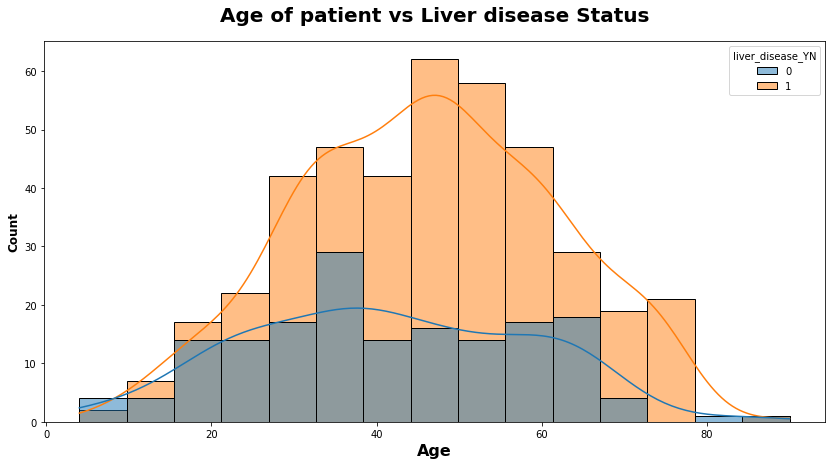

In [50]:
plt.subplots(figsize=(14,7))
sns.histplot(x="Age",hue="liver_disease_YN", data=df, kde=True)
plt.title("Age of patient vs Liver disease Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Age", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

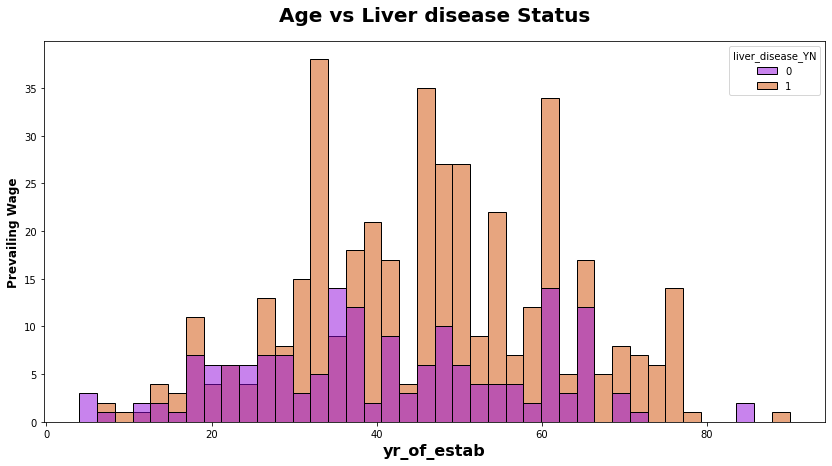

In [51]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "Age", data=df,palette='gnuplot', bins=40, hue='liver_disease_YN')
plt.title("Age vs Liver disease Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

In [52]:
numeric_features

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'liver_disease_YN']

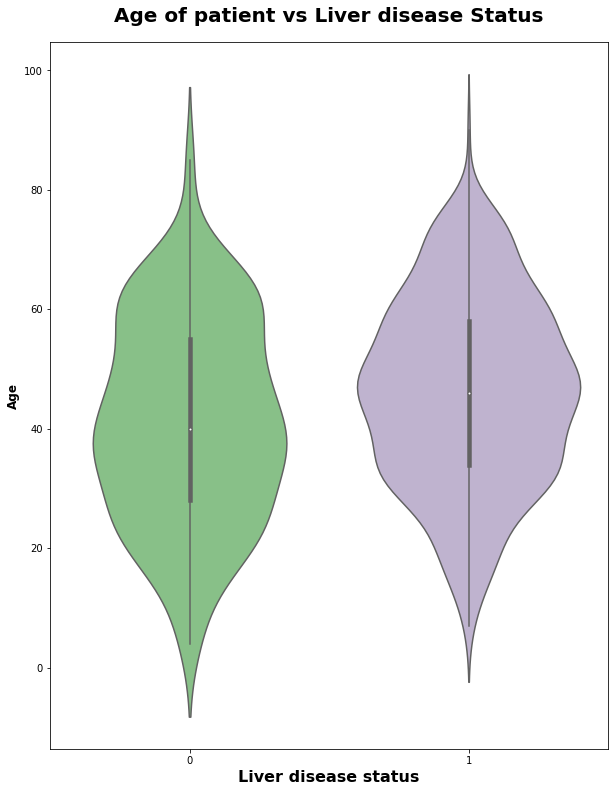

In [53]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="liver_disease_YN",y='Age', data=df, palette="Accent")
plt.title("Age of patient vs Liver disease Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Age", weight="bold", fontsize=12)
plt.xlabel("Liver disease status", weight="bold", fontsize=16)
plt.ylim()
plt.show()

### 4.4 Does applicant's previous work experience has any impact on Visa status ?

### 4.5 If the Employee requires job training, does it make any impact on visa status?

**Insights**
 - The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

### 4.6 Wages and its impact on Visa status

**Report**
* For employees who applied for hourly pay 65% of them were denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a higher chance of yearly contract than other and immediately followed by week and month.

### 4.7 Does Region of employment has impact on Visa status ?

**Report** 
* As per chart all the region have very similar pattern of getting Visa certified and Denied.
* There is a slight edge for `midwest` followed by `South` region

### 4.8 Does Prevailing wage has any impact on Visa status ?

**Insights**
 - The distribution of both the classes are same but need to handel the outliers.

#### 4.8.1 Prevailing wage based on Education

**Report**
* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
* Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

#### 4.8.2 Prevailing wage based on Job experience

**Report**
* Suprisingly people who has less job experience has more prevailing wage.
* No job experience applicant has median prevailing wage as 72k USD.
* Previous job experience applicant has median prevailing wage as 69K USD.

#### 4.8.3 Prevailing wage based on Continent

**Report**
* Average salary of people from Asia is higher than other continents.

### 4.9 Year of Establishment 

**Report**
* Each bins consists of 5 years.
* Many companies were established after year 2000.
* The most company establishment happened in year 2000-2005.

### Final Report 
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.

In [ ]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################